In [22]:
import sys
sys.path.insert(1, '../')
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.io import loadmat
from numpy.fft import fft, ifft
import random
import matplotlib as mpl
from attributedict.collections import AttributeDict



mpl.rcParams['figure.figsize'] = (16, 6) 
pi = np.pi

In [2]:

# %  VIDEO: Convolve real data with a Gaussian


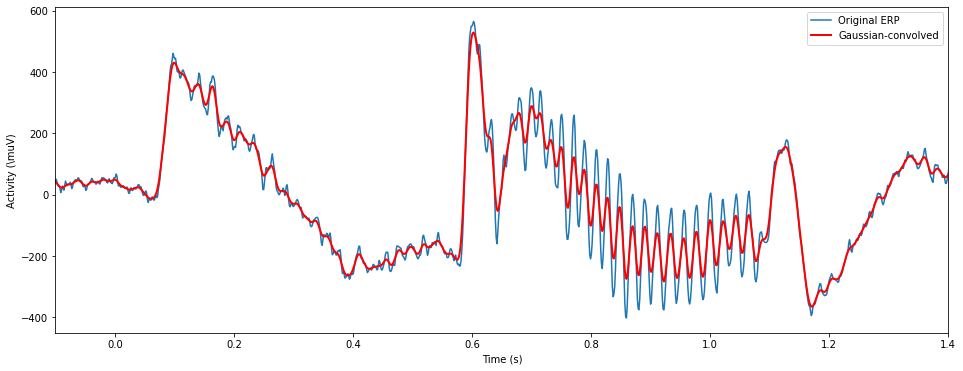

In [35]:
data = loadmat("../v1_laminar.mat")

srate = data['srate']
timevec = data['timevec'].T
# % signal will be ERP from channel 7
signal = np.mean(data['csd'][6, :, :], axis=1)

# % create a Gaussian
h = .01; # FWHM in seconds

gtime =  np.arange(-1,1,1/srate)
gaus = np.exp( -4*np.log(2)*gtime**2 / h**2 );
gaus = gaus/sum(gaus) #amplitude normalization


# %%%% run convolution
# % Step 1: N's of convolution
ndata = len(signal);
nkern = len(gaus);
nConv = ndata+nkern - 1# length of result of convolution
halfK = nkern//2


# FFTS
dataX = fft(signal, n=nConv)
kernX = fft(gaus, n=nConv)

# plt.plot(dataX)
# plt.plot(kernX)
# plt.show()

# multiply spectra
convresX = dataX * kernX

# inverse fft to get back to time domain
convres = ifft(convresX)

# cut off winds
convres = convres[halfK:-halfK+1]

plt.plot(timevec, signal, label='Original ERP')
plt.plot(timevec, convres.real,'r',linewidth=2, label='Gaussian-convolved')

plt.xlim([-.1, 1.4])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Activity (\muV)')
plt.show()

In [36]:
# %  VIDEO: Complex Morlet wavelets


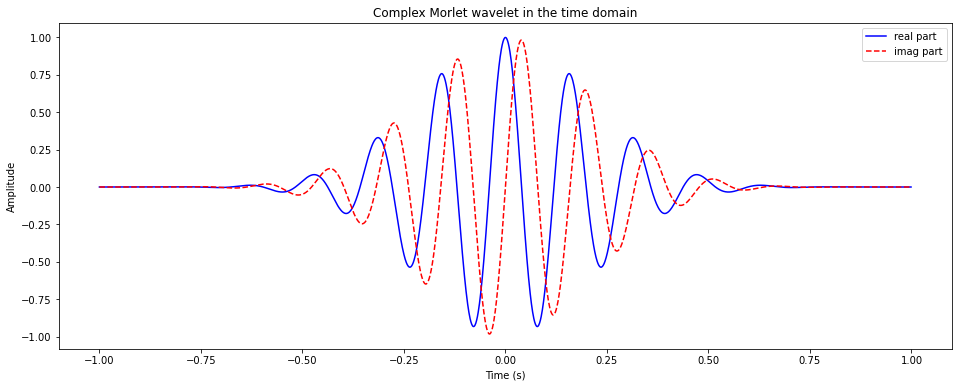

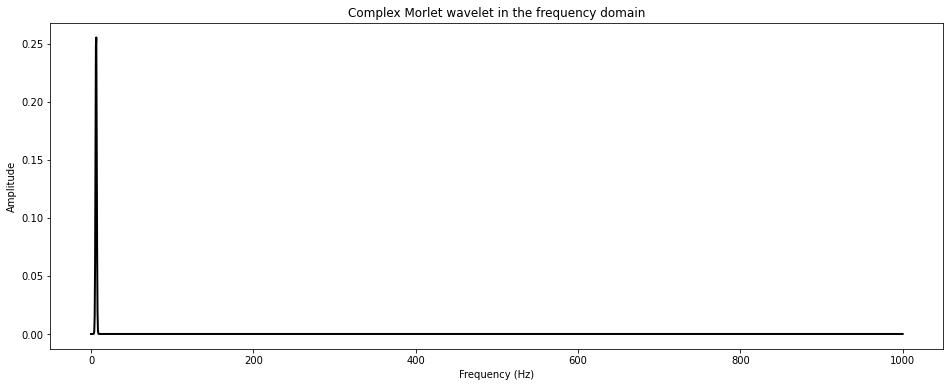

In [58]:
# % setup parameters
srate = 1000;         # in hz
time  = np.arange(-1,1,1/srate) # best practice is to have time=0 at the center of the wavelet
frex  = 2*pi;         # frequency of wavelet, in Hz

# % create sine wave
sine_wave = np.exp( 1j*2*pi*frex*time ) # hmmmm

# plt.plot(sine_wave.real)
# plt.plot(sine_wave.imag, 'r--')
# plt.show()

# % create Gaussian window
fwhm = .5; # width of the Gaussian in seconds
gaus_win = np.exp( -4*np.log(2)*time**2 / fwhm**2 )

# % now create Morlet wavelet
cmw = sine_wave * gaus_win

plt.plot(time, cmw.real,'b', label='real part')
plt.plot(time, cmw.imag,'r--', label='imag part')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Complex Morlet wavelet in the time domain')
plt.show()

# %% complex Morlet wavelet in the frequency domain

pnts = len(time)

mwX = abs(fft( cmw )/pnts);
hz  = np.linspace(0,srate,pnts);

plt.plot(hz,mwX,'k',linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Complex Morlet wavelet in the frequency domain')
plt.show()